In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('../database/segmentation.data.txt', delimiter=',')
df_train.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [8]:
df_train['SHORT-LINE-DENSITY-5'].value_counts()

0.000000    194
0.111111     16
Name: SHORT-LINE-DENSITY-5, dtype: int64

In [13]:
X_train_shape_view = df_train[['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD']]

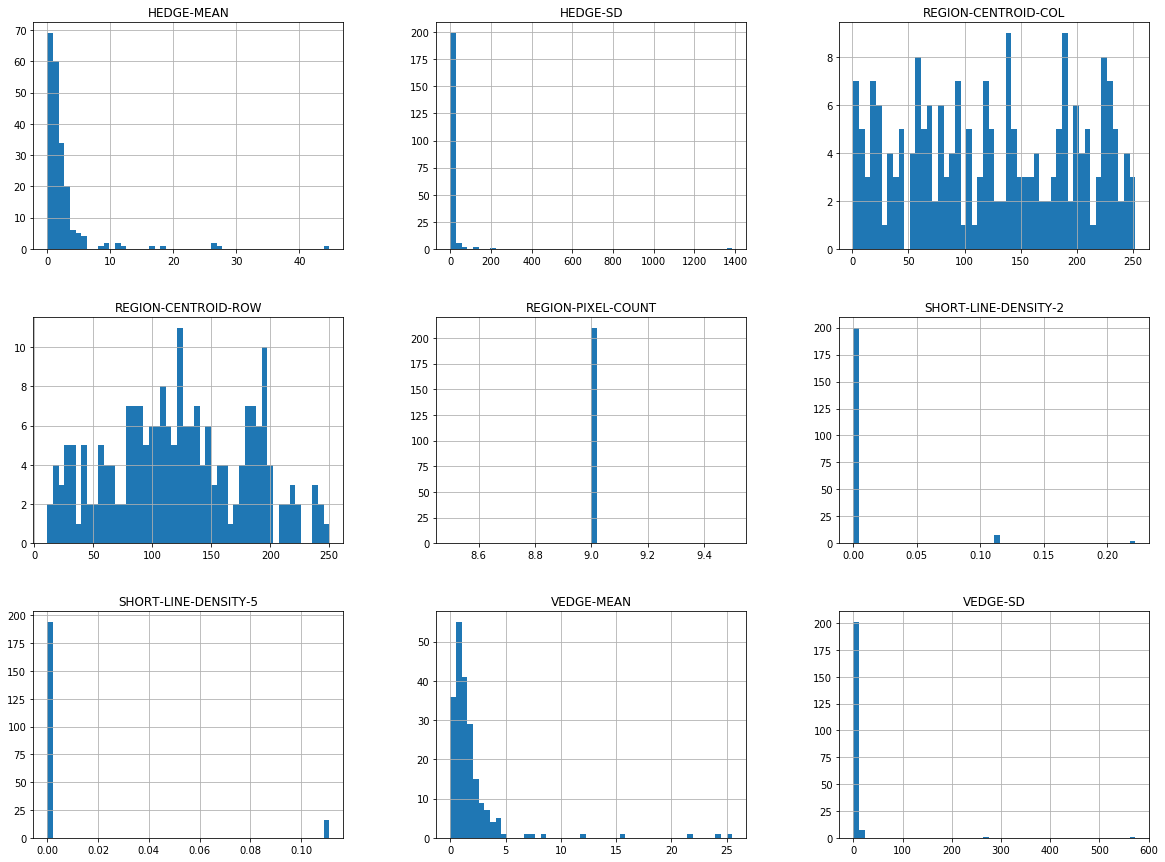

In [19]:
X_train_shape_view.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
# Load dataset.
image_segmentation = pd.read_csv('../database/segmentation.data.txt', delimiter=',')
image_segmentation_test = pd.read_csv('../database/segmentation.test.txt', delimiter=',')

X_train = image_segmentation.drop("CLASS", axis=1)
y_train = image_segmentation["CLASS"].copy()

X_test = image_segmentation_test.drop("CLASS", axis=1)
y_test = image_segmentation_test["CLASS"].copy()

In [5]:
image_segmentation.head()

,CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [47]:
a = X_train.values

In [48]:
a.shape

(210, 19)

In [59]:
a[:,[9,10,11,12,13,14,15,16,17,18] ].copy()

array([[  6.185185  ,   7.3333335 ,   7.6666665 , ...,   7.7777777 ,
          0.5456349 ,  -1.1218182 ],
       [  6.6666665 ,   8.333334  ,   7.7777777 , ...,   8.444445  ,
          0.53858024,  -0.92481726],
       [  6.111111  ,   7.5555553 ,   7.2222223 , ...,   7.5555553 ,
          0.5326279 ,  -0.96594584],
       ..., 
       [ 16.074074  ,  13.111111  ,  16.666668  , ...,  18.555555  ,
          0.29272884,   2.7898002 ],
       [ 14.148149  ,  10.888889  ,  13.        , ...,  18.555555  ,
          0.42162097,   2.3924873 ],
       [ 12.962963  ,  11.555555  ,   9.777778  , ...,  17.555555  ,
          0.44541803,   1.8388497 ]])

In [14]:
a = np.array([0,0,0,0,0,0,1,1,1,1,2,2,2,3,3,3,3,3,3])

In [16]:
c, d = np.unique(a, return_counts=True)

In [17]:
d

array([6, 4, 3, 6])

In [19]:
P_w = d/np.sum(d)

In [21]:
P_w

array([ 0.31578947,  0.21052632,  0.15789474,  0.31578947])

In [20]:
2 * P_w

array([ 0.63157895,  0.42105263,  0.31578947,  0.63157895])

In [30]:
(, axis=1)

array([3, 4, 5])

In [41]:
a =np.max([np.array([[1,2],[3,4]]), np.array([[4,1],[4,5]]), np.array([[1,2], [5,6]])], axis=0)

In [42]:
2 a

array([[4, 2],
       [5, 6]])

In [44]:
np.argmax(2 * a, axis=1)

array([0, 1])

In [32]:
t.shape

AttributeError: 'list' object has no attribute 'shape'